## Analyzing borrowers’ risk of defaulting

The goal of the project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

## Table of contents:
- [**STEP 1. Open the data file and have a look at the general information.**](#first-step)
- [**STEP 2. Data prepricessing**](#second-step)
    - [Processing missing values](#processing-missing-values)
    - [Data type replacement](#data-type-replacement)
    - [Processing duplicates](#processing-duplicates)
    - [Categorizing Data](#categorizing-data)
- [**STEP 3. Answer these questions**](#third-step)
    - [Is there a relation between having kids and repaying a loan on time?](#relation_kids_repaying_loan)
    - [Is there a relation between marital status and repaying a loan on time?](#relation_marital_status_repaying_loan)
    - [Is there a relation between income level and repaying a loan on time?](#relation_income_level_repaying_loan)
    - [How do different loan purposes affect on-time loan repayment?](#purposes_loan_repayment)
- [**STEP 4. General conclusion**](#fourth-step)

### Step 1. Open the data file and have a look at the general information. <a class="anchor" id="first-step"></a>

In [3]:
import pandas as pd
from nltk.stem import SnowballStemmer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_credit_scoring = pd.read_csv('credit_scoring_eng.csv')
data_credit_scoring.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Conclusion

The table consists of 12 columns and  21525 lines. All cells filled except the part of cells in columns 'days_employed' and ' total_income'. According to the information in the table not all people for the moment of loan have working experience and income. Conclusion can be made that 2174 borrowers don't have work and other source of income.
Columns 'days_employed' and ' total_income' have format float and others int or object.

### Step 2. Data preprocessing <a class="anchor" id="second-step"></a>

### Processing missing values <a class="anchor" id="processing-missing-values"></a>

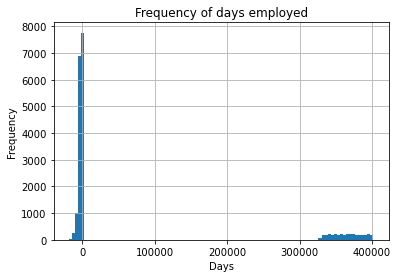

In [6]:
data_credit_scoring['days_employed'].hist(bins=100)
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.title("Frequency of days employed")
plt.show()

In [7]:
#data_credit_scoring['days_employed'].hist(bins=100)
data_credit_scoring.loc[data_credit_scoring['days_employed'] > 0, 'days_employed'] = np.nan
data_credit_scoring['days_employed'] = data_credit_scoring['days_employed'].abs()
data_credit_scoring['days_employed'].fillna(data_credit_scoring['days_employed'].mean(), inplace = True)


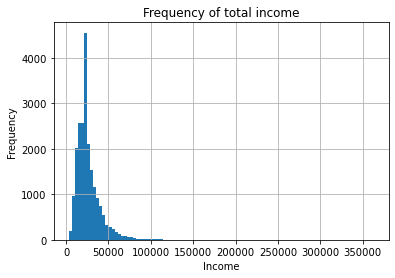

In [9]:
data_credit_scoring['total_income'].hist(bins=100)
data_credit_scoring['total_income'].fillna(data_credit_scoring.total_income.median(), inplace = True)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Frequency of total income")
plt.show()

### Conclusion

We made all values absolute to get rid of negative values. Most likely, when filling out the data, the minus was set incorrectly or a dash was implied.
Among the data on days_employed and total_income, there were too different values, which are most likely unrealistic (too large for this parameter).
We replaced days_employed by mean values and total_income with median values.

### Data type replacement <a class="anchor" id="data-type-replacement"></a>

In [10]:
#converting values to int
data_credit_scoring['days_employed'] = data_credit_scoring['days_employed'].astype(int)
data_credit_scoring['total_income'] = data_credit_scoring['total_income'].astype(int)


data_credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int64 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int64 
 11  purpose           21525 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


### Conclusion

All datas in the table have format int64 or object 

### Processing duplicates <a class="anchor" id="processing-duplicates"></a>

In [11]:
#looking for unique values in given columns
print(data_credit_scoring['education'].unique())
print(data_credit_scoring['family_status'].unique())

#assigning a uniform value in the education column depending on education_id
education_id_0 = 'bachelor\'s degree'
education_id_1 = 'secondary education'
education_id_2 = 'college'
education_id_3 = 'primary education'
education_id_4 = 'graduate degree'

#assigning a uniform value in the family_status column depending on family_status_id
family_status_id_0 = 'married'
family_status_id_1 = 'civil partnership'
family_status_id_2 = 'widow / widower'
family_status_id_3 = 'divorced'
family_status_id_4 = 'unmarried'


#assuming -1 children is 1 and 20 is 2 and changing ones
data_credit_scoring.loc[data_credit_scoring['children'] == -1, 'children'] = 1
data_credit_scoring.loc[data_credit_scoring['children'] == 20, 'children'] = 2

#setting unified education name based on education id
data_credit_scoring.loc[data_credit_scoring['education_id'] == 0, 'education'] = education_id_0
data_credit_scoring.loc[data_credit_scoring['education_id'] == 1, 'education'] = education_id_1
data_credit_scoring.loc[data_credit_scoring['education_id'] == 2, 'education'] = education_id_2
data_credit_scoring.loc[data_credit_scoring['education_id'] == 3, 'education'] = education_id_3
data_credit_scoring.loc[data_credit_scoring['education_id'] == 4, 'education'] = education_id_4

#setting unified family status name based on family status id
data_credit_scoring.loc[data_credit_scoring['family_status_id'] == 0, 'family_status'] = family_status_id_0
data_credit_scoring.loc[data_credit_scoring['family_status_id'] == 1, 'family_status'] = family_status_id_1
data_credit_scoring.loc[data_credit_scoring['family_status_id'] == 2, 'family_status'] = family_status_id_2
data_credit_scoring.loc[data_credit_scoring['family_status_id'] == 3, 'family_status'] = family_status_id_3
data_credit_scoring.loc[data_credit_scoring['family_status_id'] == 4, 'family_status'] = family_status_id_4

#counting rows with duplicates
with_duplicates = len(data_credit_scoring)

#dropping duplicates
data_credit_scoring = data_credit_scoring.drop_duplicates()

duplicates = with_duplicates - len(data_credit_scoring)

print('deleted '+str(duplicates) + ' duplicates')



["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree']
['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']
deleted 71 duplicates


### Conclusion

We generalized 5 options of education and 5 family statuses according to the education_id and family_status_id.
We brought into accordance values in the columns education and family status.
Then we removed the duplicated rows having used function drop_duplicates().
The amount of the duplicated rows was 71.
We supposed that values in column 'children' -1 and 20 erroneous and changed them to 1 and 2 accordingly.
There was a lot of duplicates because of lowercase and uppercase, so we convert everything to lowercase

### Categorizing Data <a class="anchor" id="categorizing-data"></a>

In [13]:
from nltk.stem import SnowballStemmer
english_stemmer = SnowballStemmer('english')

#PURPOSE GROUPS:
# REAL ESTATE (house, estate, property)
# CAR (car)
# EDUCATION (education, university)
# WEDDING (wedding)
#creating stems list for each purpose group
real_estate_stems = ['estate', 'house', 'property']
real_estate_stems = [english_stemmer.stem(word) for word in real_estate_stems]
car_stems = ['car']
car_stems = [english_stemmer.stem(word) for word in car_stems]
education_stems = ['education', 'university']
education_stems = [english_stemmer.stem(word) for word in education_stems]
wedding_stems = ['wedding']
wedding_stems = [english_stemmer.stem(word) for word in wedding_stems]

#creating two new columns to generalize purposes and total incomes
data_credit_scoring['purpose_simplified'] = ' '
data_credit_scoring['income_level'] = ' '

#setting new columns values
for index, row in data_credit_scoring.iterrows():
    income = row['total_income']
    if income < 30000:
        data_credit_scoring.loc[index, 'income_level'] = 'low'
    elif income <= 85000:
        data_credit_scoring.loc[index, 'income_level'] = 'average'
    else:
        data_credit_scoring.loc[index, 'income_level'] = 'high'

    for word in row['purpose'].split(' '):
        word_stem = english_stemmer.stem(word)
        if word_stem in real_estate_stems:
            data_credit_scoring.loc[index, 'purpose_simplified'] = 'real estate'
            break
        if word_stem in car_stems:
            data_credit_scoring.loc[index, 'purpose_simplified'] = 'car'
            break
        if word_stem in education_stems:
            data_credit_scoring.loc[index, 'purpose_simplified'] = 'education'
            break
        if word_stem in wedding_stems:
            data_credit_scoring.loc[index, 'purpose_simplified'] = 'wedding'
            break


#function to assign age group
def age_group(age):
    if age <= 30:
        return 'young adult'
    elif age <= 50:
        return 'adult'
    else:
        return 'senior'

#setting age groups by applying function
data_credit_scoring['age_group'] = data_credit_scoring['dob_years'].apply(age_group)

print(data_credit_scoring.groupby('family_status')['purpose_simplified'].value_counts().head(50))
print(data_credit_scoring['income_level'].value_counts())
print(data_credit_scoring.groupby('education')['income_level'].value_counts())
print(data_credit_scoring.groupby('income_level')['purpose_simplified'].value_counts())
print(data_credit_scoring.groupby('age_group')['debt'].value_counts())


family_status      purpose_simplified
civil partnership  wedding               2324
                   real estate            989
                   car                    434
                   education              404
divorced           real estate            676
                   car                    281
                   education              238
married            real estate           7008
                   car                   2736
                   education             2595
unmarried          real estate           1596
                   car                    637
                   education              577
widow / widower    real estate            542
                   car                    218
                   education              199
Name: purpose_simplified, dtype: int64
low        15535
average     5747
high         172
Name: income_level, dtype: int64
education            income_level
bachelor's degree    low              3126
                     avera

### Conclusion

There were many various purposes of loan in the table, which we accumulated into 4 basic groups by using stemming.
Also we sorted incomes by levels.
New columns income_level and purpose_simplified were created to more clearly reflect information about income and purposes of the loan.
Using function apply() people were distributed to age groups

### Step 3. Answer these questions <a class="anchor" id="third-step"></a>

- Is there a relation between having kids and repaying a loan on time? <a class="anchor" id="relation_kids_repaying_loan"></a>

In [14]:
print(data_credit_scoring['children'].value_counts())

#finding debt ratio for 0,1,2 kids
for kids in range(3):
    N_kids_with_debt = len(data_credit_scoring[(data_credit_scoring['children'] == kids) & (data_credit_scoring['debt'] == 1)])
    N_kids_all = len(data_credit_scoring[data_credit_scoring['children'] == kids])
    N_kids_debt_ratio = N_kids_with_debt / N_kids_all
    print('{} kids debt ratio: {:.3f}'.format(kids, N_kids_debt_ratio))

#joining up 3 and more kids to find debt ratio
many_kids_with_debt = 0
many_kids_all = 0
many_kids_debt_ratio = 0


for kids in range(3, 6):
    many_kids_with_debt += len(data_credit_scoring[(data_credit_scoring['children'] == kids) & (data_credit_scoring['debt'] == 1)])
    many_kids_all += len(data_credit_scoring[data_credit_scoring['children'] == kids])

many_kids_debt_ratio = many_kids_with_debt / many_kids_all

print('3+ kids debt ratio: {:.3f}'.format(many_kids_debt_ratio))


0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64
0 kids debt ratio: 0.075
1 kids debt ratio: 0.092
2 kids debt ratio: 0.095
3+ kids debt ratio: 0.082


### Conclusion

According to the given dataset we can see that the appearance of children affects on repaying a loan on time.
In a situation without children, untimely loan repayment occurs in 7.5 percent of cases, while with the appearance of at least one child, this percentage rises to 9.2%.
At the same time, the difference in the number of children does not significantly affect the indicator of timely payments.
We combined 3 and more kids into one group, because of the inessential data.

- Is there a relation between marital status and repaying a loan on time? <a class="anchor" id="relation_marital_status_repaying_loan"></a>

In [15]:
print(data_credit_scoring.groupby('family_status')['debt'].value_counts())

partnership_statuses = data_credit_scoring['family_status'].unique()

for status in partnership_statuses:
    status_partnership_with_debt = len(data_credit_scoring[(data_credit_scoring['family_status'] == status) & (data_credit_scoring['debt'] == 1)])
    status_partnership_all = len(data_credit_scoring[data_credit_scoring['family_status'] == status])
    status_partnership_debt_ratio = status_partnership_with_debt / status_partnership_all
    print('{} debt ratio: {:.3f}'.format(status, status_partnership_debt_ratio))

family_status      debt
civil partnership  0        3763
                   1         388
divorced           0        1110
                   1          85
married            0       11408
                   1         931
unmarried          0        2536
                   1         274
widow / widower    0         896
                   1          63
Name: debt, dtype: int64
married debt ratio: 0.075
civil partnership debt ratio: 0.093
widow / widower debt ratio: 0.066
divorced debt ratio: 0.071
unmarried debt ratio: 0.098


### Conclusion

The lowest percentage of loan defaults in the widow / widower group.
Average percentage of loan defaults by married and divorced
Highest percentage of loan delinquencies by unmarried people and civil partnerships.

This result may be due to the fact that, as a rule, unmarried people and in a civil partnerships are younger in age than other groups and, as a result, may have less work experience and income level to make payment by the loan on time.

- Is there a relation between income level and repaying a loan on time? <a class="anchor" id="relation_income_level_repaying_loan"></a>

In [16]:
print(data_credit_scoring.groupby('income_level')['debt'].value_counts())

income_levels = data_credit_scoring['income_level'].unique()

for level in income_levels:
    income_level_with_debt = len(data_credit_scoring[(data_credit_scoring['income_level'] == level) & (data_credit_scoring['debt'] == 1)])
    income_level_all = len(data_credit_scoring[data_credit_scoring['income_level'] == level])
    income_level_debt_ratio = income_level_with_debt / income_level_all
    print('{} income level debt ratio: {:.3f}'.format(level, income_level_debt_ratio))


income_level  debt
average       0        5321
              1         426
high          0         162
              1          10
low           0       14230
              1        1305
Name: debt, dtype: int64
average income level debt ratio: 0.074
low income level debt ratio: 0.084
high income level debt ratio: 0.058


### Conclusion

By distributing people by income levels and calculating the ratio of untimely refunded loans to the total number of loans by groups, we can conclude that the higher the income, the lower the percentage of delays in payments

- How do different loan purposes affect on-time repayment of the loan? <a class="anchor" id="purposes_repayment_loan"></a>

In [17]:
print(data_credit_scoring.groupby('purpose_simplified')['debt'].value_counts())
purposes = data_credit_scoring['purpose_simplified'].unique()

for purpose in purposes:
    purpose_with_debt = len(data_credit_scoring[(data_credit_scoring['purpose_simplified'] == purpose) & (data_credit_scoring['debt'] == 1)])
    purpose_all = len(data_credit_scoring[data_credit_scoring['purpose_simplified'] == purpose])
    purpose_debt_ratio = purpose_with_debt / purpose_all
    print('{} purpose debt ratio: {:.3f}'.format(purpose, purpose_debt_ratio))

purpose_simplified  debt
car                 0        3903
                    1         403
education           0        3643
                    1         370
real estate         0       10029
                    1         782
wedding             0        2138
                    1         186
Name: debt, dtype: int64
real estate purpose debt ratio: 0.072
car purpose debt ratio: 0.094
education purpose debt ratio: 0.092
wedding purpose debt ratio: 0.080


### Conclusion

According to the given datas if people take a loan for purchasing a car they have more delays in repayment in comparison with the other purposes of loan. And on the other hand when buying real estate, there are fewer delays in the payment of the loan

### Step 4. General conclusion <a class="anchor" id="fourth-step"></a>

According to the given dataset we can see that the appearance of children affects on repaying a loan on time, but at the same time the difference in the number of children does not significantly affect the indicator of timely payments.
The lowest percentage of loan defaults in the widow / widower group, average percentage of loan defaults is stated by married and divorced group and highest percentage of loan delinquencies is observed by unmarried people and civil partnerships.
We also noticed that the higher the income was, the lower the percentage of delays in payments was.
As well as we observed, that car-purchasing loans were refunded worse than others. 
On the other hand we stated that real estate (mortgage) loans were repaid almost always on time.